Analysing the data set of IPL since inception.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pandas_profiling import ProfileReport

In [ ]:
ball_by_ball=pd.read_csv("https://raw.githubusercontent.com/nitishwaa/IPL_data_visualization/master/IPL%20Ball-by-Ball%202008-2020.csv")

In [ ]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
match_dataset=pd.read_csv("https://raw.githubusercontent.com/nitishwaa/IPL_data_visualization/master/IPL%20Matches%202008-2020.csv")

In [ ]:
match_dataset


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [ ]:
# game with the biggest win by runs
biggest_win_by_runs = match_dataset['result_margin'].max()
print("By far the biggest win margin was "+ str(biggest_win_by_runs)+" runs")



By far the biggest win margin was 146.0 runs


In [ ]:
# which game was that?
ff=match_dataset.loc[match_dataset['result_margin']==biggest_win_by_runs]
ff

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan


In [ ]:
# now lets check the highest win margin by wickets 
biggest_win_by_wickets = (match_dataset['result_margin'][match_dataset['result']=='wickets']).max()
print("By far the biggest win margin was "+ str(biggest_win_by_wickets)+" wickets")

By far the biggest win margin was 10.0 wickets


In [ ]:
# which game?
f=match_dataset.loc[(match_dataset['result_margin']==biggest_win_by_wickets)&(match_dataset['result']=='wickets')]
f

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
12,335994,Mumbai,2008-04-27,AC Gilchrist,Dr DY Patil Sports Academy,0,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,N,NaN,Asad Rauf,SL Shastri
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
124,419115,Bangalore,2010-03-18,JH Kallis,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,N,NaN,K Hariharan,DJ Harper
239,501263,Mumbai,2011-05-20,SR Watson,Wankhede Stadium,0,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,Rajasthan Royals,wickets,10.0,N,NaN,RE Koertzen,PR Reiffel
317,548377,Jaipur,2012-05-20,DR Smith,Sawai Mansingh Stadium,0,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,Mumbai Indians,wickets,10.0,N,NaN,HDPK Dharmasena,C Shamshuddin
331,598007,Chandigarh,2013-04-10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,10.0,N,NaN,Aleem Dar,C Shamshuddin
483,829757,Delhi,2015-04-26,VR Aaron,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,N,NaN,M Erasmus,S Ravi
531,980929,Rajkot,2016-04-21,B Kumar,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,K Bharatan,HDPK Dharmasena
579,1082593,Rajkot,2017-04-07,CA Lynn,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,10.0,N,NaN,Nitin Menon,CK Nandan
611,1082626,Chandigarh,2017-04-30,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,10.0,N,NaN,YC Barde,CK Nandan


Seems like lot of team won by 10 wickets margin

In [ ]:
team_biggest_win=[]
team_biggest_win.append(ff['date'].item())
team_biggest_win.append(ff['venue'].item())
team_biggest_win.append(ff['city'].item())
team_biggest_win.append(ff['team1'].item())
team_biggest_win.append(ff['team2'].item())
team_biggest_win.append(ff['winner'].item())

team_biggest_win

['2017-05-06',
 'Feroz Shah Kotla',
 'Delhi',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Mumbai Indians']

In [ ]:
tie=match_dataset.loc[match_dataset['result']=='tie']
tie

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [ ]:
venue_with_most_tie=(tie['venue'][tie['result']=='tie']).value_counts()
print(venue_with_most_tie)

Dubai International Cricket Stadium          3
Sheikh Zayed Stadium                         2
Newlands                                     1
MA Chidambaram Stadium, Chepauk              1
Rajiv Gandhi International Stadium, Uppal    1
M Chinnaswamy Stadium                        1
Sardar Patel Stadium, Motera                 1
Saurashtra Cricket Association Stadium       1
Feroz Shah Kotla                             1
Wankhede Stadium                             1
Name: venue, dtype: int64


In [ ]:
win_by_dl=(match_dataset.loc[match_dataset['method']=='D/L'])
win_by_dl[['city','venue','team1','team2','winner']]

,city,venue,team1,team2,winner
40,Delhi,Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
43,Kolkata,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings
60,Cape Town,Newlands,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils
63,Durban,Kingsmead,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
89,Centurion,SuperSport Park,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings
192,Kochi,Nehru Stadium,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala
221,Kolkata,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders
231,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore
429,Delhi,Feroz Shah Kotla,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad
477,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad


In [ ]:
# venue with most no of D/L
venue_with_most_dl=(win_by_dl['venue'][win_by_dl['method']=='D/L']).value_counts()
venue_with_most_dl[:1]

Eden Gardens    4
Name: venue, dtype: int64

In [ ]:
# which team won most matches by D/L
team_with_most_dl=(win_by_dl['winner'][win_by_dl['method']=='D/L']).value_counts()
team_with_most_dl

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Kings XI Punjab                2
Chennai Super Kings            2
Delhi Daredevils               2
Sunrisers Hyderabad            2
Rising Pune Supergiants        2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

In [ ]:
team_with_most_dl

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Kings XI Punjab                2
Chennai Super Kings            2
Delhi Daredevils               2
Sunrisers Hyderabad            2
Rising Pune Supergiants        2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

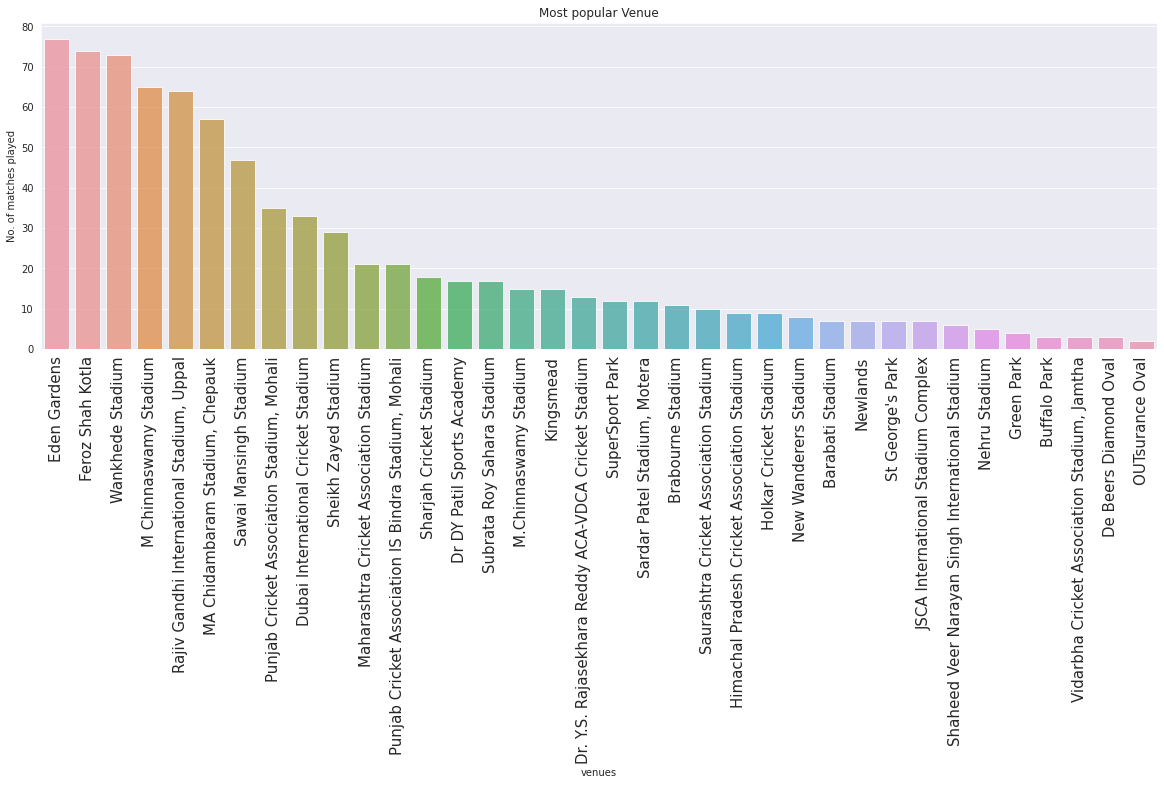

In [ ]:
%matplotlib inline
sns.set_style("darkgrid")
ls=match_dataset['venue'].value_counts().sort_values(ascending=False)
ls=ls[:]
plt.figure(figsize=(20,6))
most_played=sns.barplot(x=ls.index, y=ls.values, alpha=0.8)
plt.title("Most popular Venue");
plt.xlabel("venues", fontsize=10)
plt.ylabel("No. of matches played", fontsize=10)
most_played.set_xticklabels(rotation=90, labels=ls.index, fontsize=15)
plt.show()

# **Visualization - Match Statistics**

In [ ]:
mom=match_dataset['player_of_match'].value_counts().sort_values(ascending=False)
df=pd.DataFrame(mom.values,mom.index, columns=['No. Of. Man of the match'])
df.index.names=['player']
df

,No. Of. Man of the match
player,
AB de Villiers,23
CH Gayle,22
RG Sharma,18
DA Warner,17
MS Dhoni,17
...,...
DL Chahar,1
HF Gurney,1
K Rabada,1


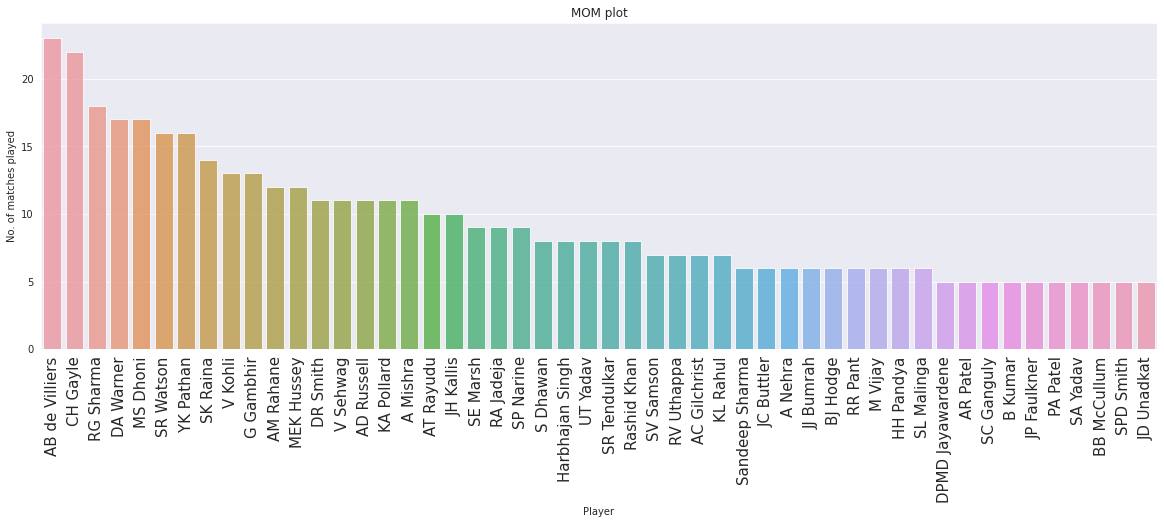

In [ ]:
%matplotlib inline
sns.set_style("darkgrid")
ls=match_dataset['player_of_match'].value_counts().sort_values(ascending=False)
ls=ls[:50]
plt.figure(figsize=(20,6))
most_played=sns.barplot(x=ls.index, y=ls.values, alpha=0.8)
plt.title("MOM plot");
plt.xlabel("Player", fontsize=10)
plt.ylabel("No. of matches played", fontsize=10)
most_played.set_xticklabels(rotation=90, labels=ls.index, fontsize=15)
plt.show()

Text(0.5, 0, 'Season')

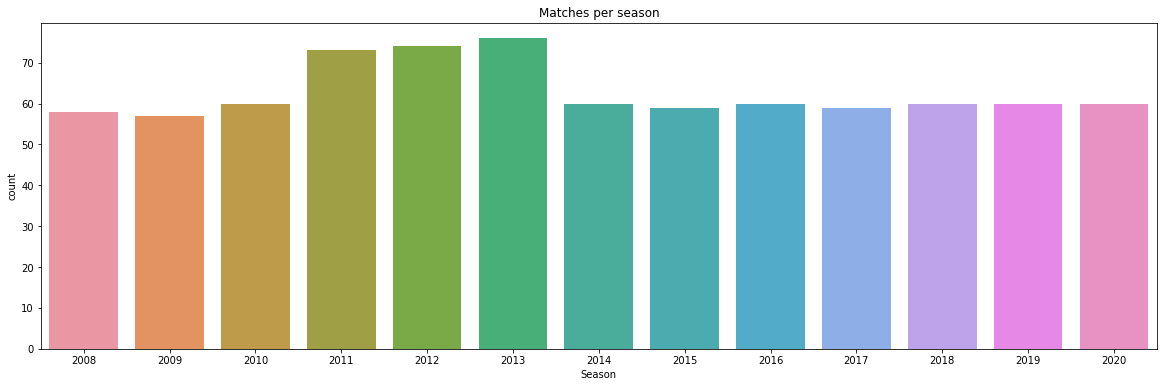

In [ ]:
match_dataset['year'] = pd.DatetimeIndex(match_dataset['date']).year
plt.figure(figsize=(20,6))
most_matches_in_a_year=sns.countplot(x='year', data=match_dataset)
plt.title("Matches per season");
plt.xlabel("Season", fontsize=10)


Looks like 2013 was the season when most matches were played


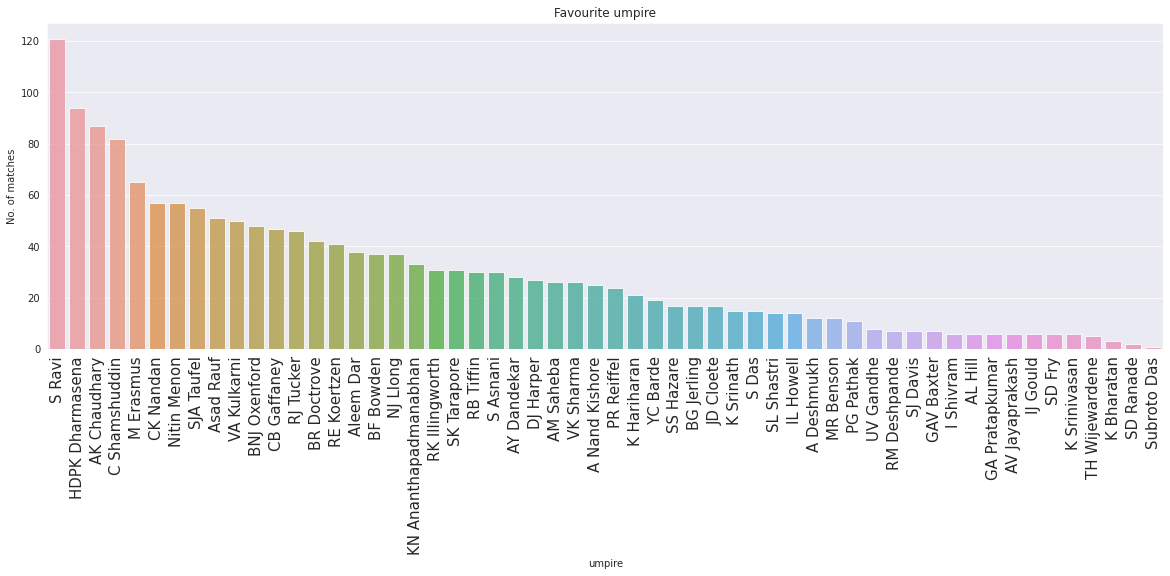

In [ ]:
# lets check out the most favourite umpire
%matplotlib inline
sns.set_style("darkgrid")
ls=pd.concat([match_dataset['umpire1'], match_dataset['umpire2']]).value_counts().sort_values(ascending=False)
ls=ls[:]
plt.figure(figsize=(20,6))
most_played=sns.barplot(x=ls.index, y=ls.values, alpha=0.8)
plt.title("Favourite umpire");
plt.xlabel("umpire", fontsize=10)
plt.ylabel("No. of matches", fontsize=10)
most_played.set_xticklabels(rotation=90, labels=ls.index, fontsize=15)
plt.show()

# **Stadium Wise Analysis**

In [ ]:
venue_with_most_matches=(match_dataset['venue']).value_counts()
venue_with_most_matches[:6]

Eden Gardens                                 77
Feroz Shah Kotla                             74
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Rajiv Gandhi International Stadium, Uppal    64
MA Chidambaram Stadium, Chepauk              57
Name: venue, dtype: int64

# We will analyze 6 most popular venues

1. *Eden Gardens*

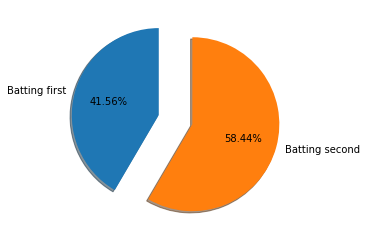

In [ ]:
%matplotlib inline
Eden_Gardens=match_dataset['venue'][match_dataset['venue']=='Eden Gardens']
win_by_run = match_dataset['result_margin'][match_dataset['result']=='runs'][match_dataset['venue']=='Eden Gardens']
slices=[len(win_by_run),(len(Eden_Gardens)-len(win_by_run))]
label=['Batting first','Batting second']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

2.*Feroz Shah Kotla*

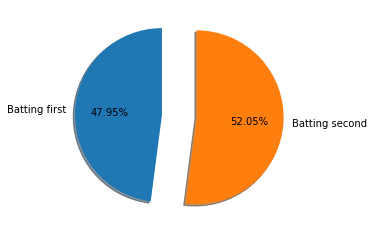

In [ ]:
%matplotlib inline
venue_with_most_dl=match_dataset['venue'][match_dataset['venue']=='Feroz Shah Kotla']
win_by_run = match_dataset['result_margin'][match_dataset['result']=='runs'][match_dataset['venue']=='Feroz Shah Kotla']
slices=[len(win_by_run),(len(venue)-len(win_by_run))]
label=['Batting first','Batting second']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

3.*Wankhede Stadium*

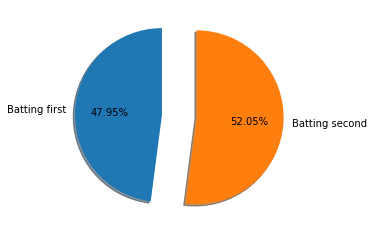

In [ ]:
%matplotlib inline
venue=match_dataset['venue'][match_dataset['venue']=='Wankhede Stadium']
win_by_run = match_dataset['result_margin'][match_dataset['result']=='runs'][match_dataset['venue']=='Wankhede Stadium']
slices=[len(win_by_run),(len(venue)-len(win_by_run))]
label=['Batting first','Batting second']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

4. *M Chinnaswamy Stadium*

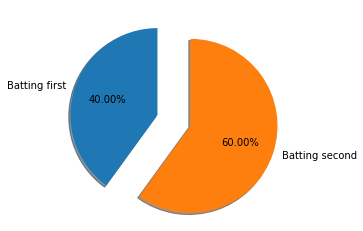

In [ ]:
%matplotlib inline
venue=match_dataset['venue'][match_dataset['venue']=='M Chinnaswamy Stadium']
win_by_run = match_dataset['result_margin'][match_dataset['result']=='runs'][match_dataset['venue']=='M Chinnaswamy Stadium']
slices=[len(win_by_run),(len(venue)-len(win_by_run))]
label=['Batting first','Batting second']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

5. *Rajiv Gandhi International Stadium, Uppal*

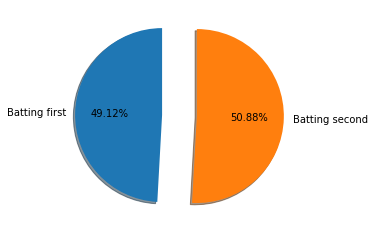

In [ ]:
%matplotlib inline
venue_with_most_dl=match_dataset['venue'][match_dataset['venue']=='Rajiv Gandhi International Stadium, Uppal']
win_by_run = match_dataset['result_margin'][match_dataset['result']=='runs'][match_dataset['venue']=='Rajiv Gandhi International Stadium, Uppal']
slices=[len(win_by_run),(len(venue)-len(win_by_run))]
label=['Batting first','Batting second']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

6. *MA Chidambaram Stadium, Chepauk*

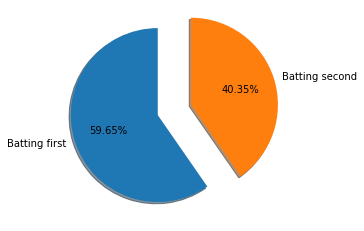

In [ ]:
%matplotlib inline
venue=match_dataset['venue'][match_dataset['venue']=='MA Chidambaram Stadium, Chepauk']
win_by_run = match_dataset['result_margin'][match_dataset['result']=='runs'][match_dataset['venue']=='MA Chidambaram Stadium, Chepauk']
slices=[len(win_by_run),(len(venue)-len(win_by_run))]
label=['Batting first','Batting second']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

# **Year 2019 analysis**

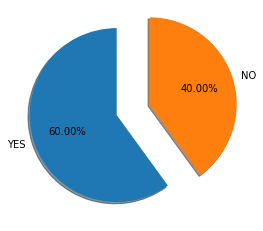

In [ ]:
# Does toss winner also wins the match?

%matplotlib inline
match_2019=match_dataset[match_dataset['year']==2019]
df = match_2019[match_2019['toss_winner']==match_2019['winner']]
slices=[len(df),(len(match_2019)-len(df))]
label=['YES','NO']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

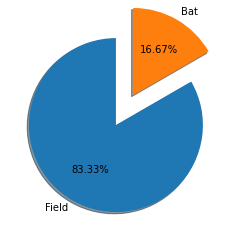

In [ ]:
# What do the toss winners choose?
%matplotlib inline
decision=match_2019[match_2019['toss_decision']=='field']
#df = match_2019[match_2019['toss_winner']==match_2019['winner']]
slices=[len(decision),(len(match_2019)-len(decision))]
label=['Field','Bat']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

Toss winners decide to field first


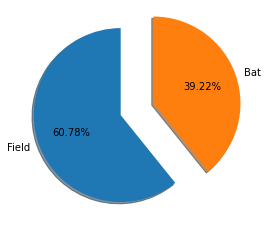

In [ ]:
# But why ?
# What do the toss winners choose?
%matplotlib inline
decision=match_dataset[match_dataset['toss_decision']=='field']
#df = match_2019[match_2019['toss_winner']==match_2019['winner']]
slices=[len(decision),(len(match_dataset)-len(decision))]
label=['Field','Bat']
plt.pie(slices,labels=label,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%')
plt.show()

As we can clearly see the trend of year 2019, team fielding first has higher chances of wining the match also